In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from deep_gamma import DATA_PATH
from deep_gamma.ops import parity_plot, calculate_scores, remove_frame

In [3]:
aspen_data = pd.read_csv(DATA_PATH / "01_raw" / "aspen_data.csv")
aspen_data = aspen_data.rename(columns={"TRange": "temperature (K)", "x1": "x(1)"})

In [4]:
df = pd.read_csv(DATA_PATH/"data_no_features.csv")
features = pd.read_csv(DATA_PATH/"features.csv")
cosmo_df = pd.concat([df, features], axis=1)

In [5]:
merged_df = aspen_data.merge(
    cosmo_df, 
    on=['smiles_1', 'smiles_2', 'temperature (K)', "x(1)"],
    how="left",
    suffixes=("", "_pred")
)

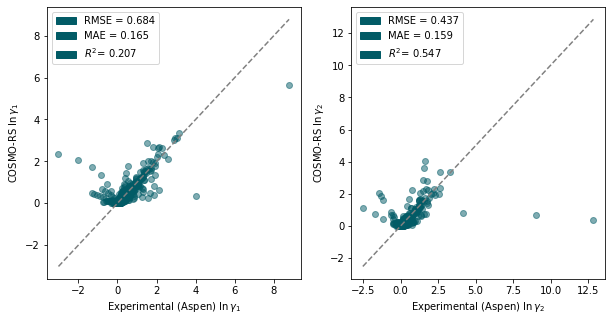

In [21]:
# Make parity plot
merged_df = merged_df.dropna()
for i in [1,2]:
    for j in ["", "_pred"]:
        merged_df[f"ln_gamma_{i}{j}"] = merged_df[f"ln_gamma_{i}{j}"].astype(float)
scores = calculate_scores(merged_df, target_columns=["ln_gamma_1", "ln_gamma_2"])
fig, axes = parity_plot(
    merged_df, 
    target_columns=["ln_gamma_1", "ln_gamma_2"],
    format_gammas=True,
    scores=scores,
    alpha=0.5
)
for i, ax in enumerate(axes):
    ax.set_xlabel(f"Experimental (Aspen) $\ln \gamma_{i+1}$")
    ax.set_ylabel(f"COSMO-RS $\ln \gamma_{i+1}$")
fig.savefig(DATA_PATH / "08_reporting" / "aspen_vs_cosmo_parity_plot.png", dpi=300)

/Users/Kobi/Library/Caches/pypoetry/virtualenvs/deep-gamma-hf50-0Vw-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


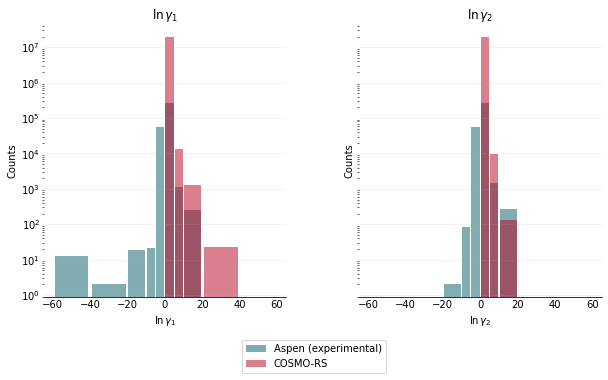

In [53]:
import matplotlib.ticker as ticker
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.subplots_adjust(wspace=0.5)
colors = ["#025b66", "#b7001e"]
bins=[-60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60]
lines = []
for j, df in enumerate([aspen_data, cosmo_df]):
    for ax, i in zip(axes, [1,2]):
        l = df.dropna().hist(
            f"ln_gamma_{i}",
            grid=False, ax=ax,
            bins=bins, 
            rwidth=0.9, 
            color=colors[j],
            alpha=0.5,
        )
        lines.append(l)
        ax.grid(axis="y", alpha=0.2)
        ax.tick_params(length=0)
        ax.set_title(f"$\ln \gamma_{i}$")
        ax.set_xlabel(f"$\ln \gamma_{i}$")
        ax.set_ylabel("Counts")
        # ax.yaxis.set_major_formatter(ticker.FuncFormatter(
        #     lambda y, pos: '%.0f' % (y * 1e-3)))
        ax.set_yscale("log")
        remove_frame(ax)
# cosmo_patch = mpatches.Patch(label="COSMO-RS", color=colors[0])
# aspen_patch = mpatches.Patch(label="Aspen (experimental)", color=colors[1])
# fig.legend([cosmo_patch, aspen_patch])
# for ax in axes:
#     ax.legend(["Aspen (experimental)", "COSMO-RS"], loc="upper right")
labels=["Aspen (experimental)", "COSMO-RS"]
leg = fig.legend(lines[-2:], loc="lower center", labels=labels, bbox_to_anchor=(0.5, -0.1))
fig.savefig(
    "../data/08_reporting/aspen_cosmo_distributions.png", 
    dpi=300, 
    bbox_inches="tight",
    bbox_extra_artists=(leg,),
    pad_inches=0.5
)